In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

# 1)	Carga de Datos y Analisis


In [4]:
from google.colab import files
uploaded = files.upload()

Saving SaratogaHouses.csv to SaratogaHouses.csv


In [7]:
for filename in uploaded.keys():
    df = pd.read_csv("SaratogaHouses.csv")


In [8]:
print(f"el data set tiene {df.shape} filas y columnas")

el data set tiene (1728, 16) filas y columnas


In [9]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]
percentageOfnull(df)

,Null Count,Null Percentage,DataTypes


no hay valores nulos

In [10]:
df.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

In [11]:
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [12]:
df.dtypes

price                int64
lotSize            float64
age                  int64
landValue            int64
livingArea           int64
pctCollege           int64
bedrooms             int64
fireplaces           int64
bathrooms          float64
rooms                int64
heating             object
fuel                object
sewer               object
waterfront          object
newConstruction     object
centralAir          object
dtype: object

In [13]:
df.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


 ## analisis de la  variable objetivo

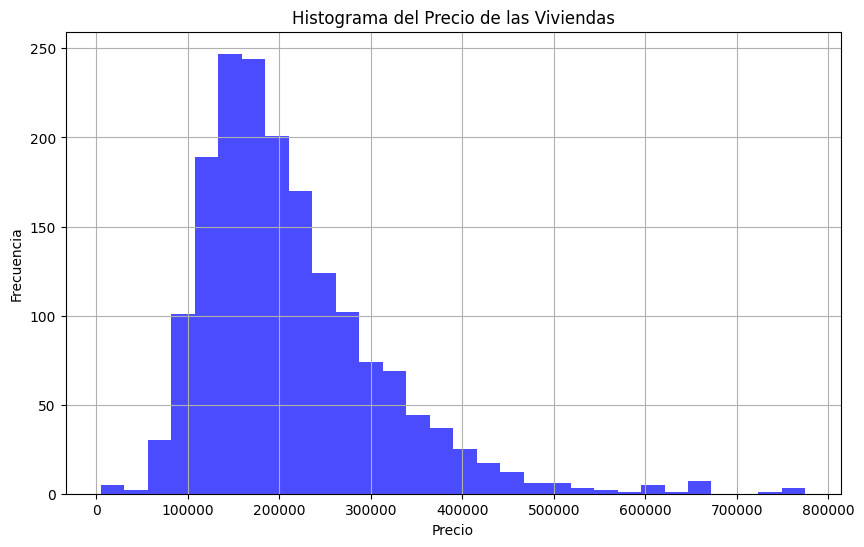

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma del Precio de las Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


hay asimetría a la derecha

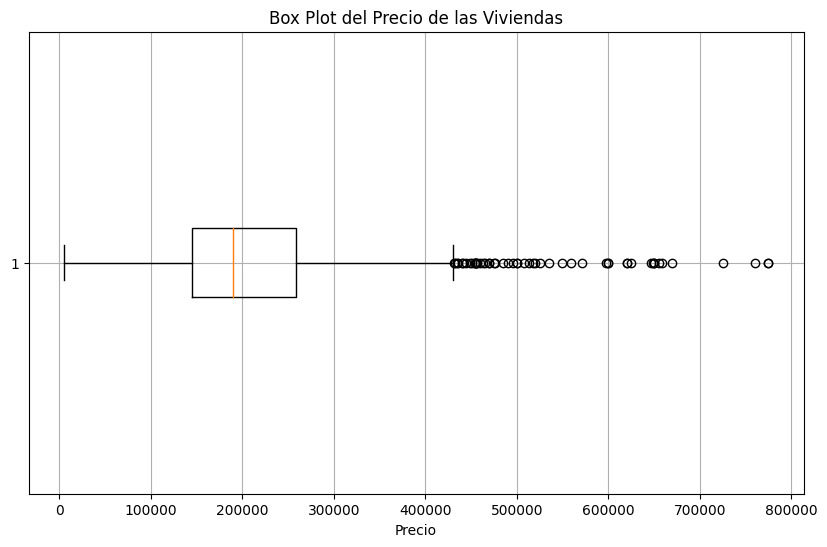

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot del Precio de las Viviendas')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

hay valores outliers en la variable Precio. No decido eliminarlos hasta no saber si son datos erroneos o spropiedades de alto valor. Podria agregarle una transformacion logaritmica


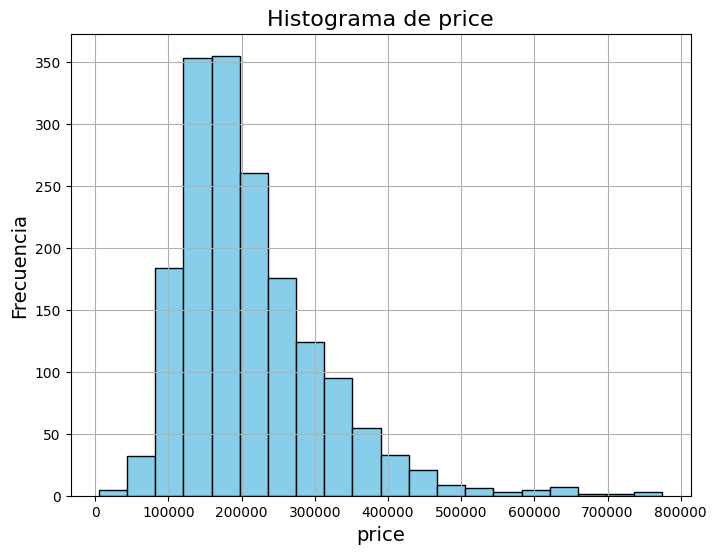

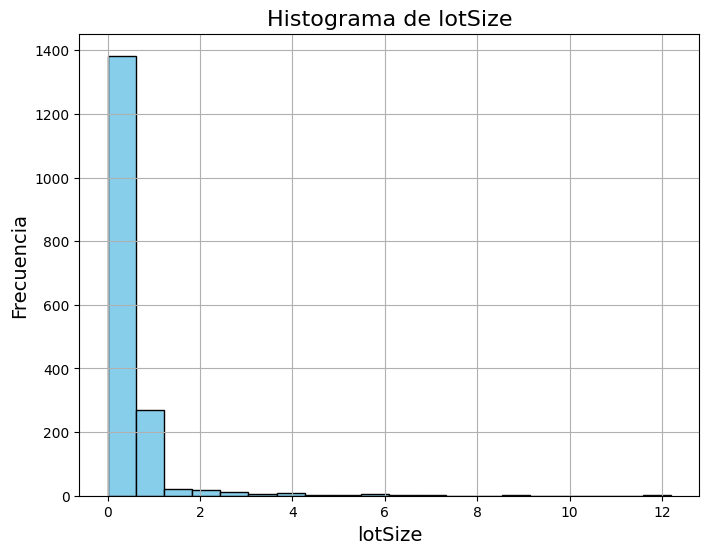

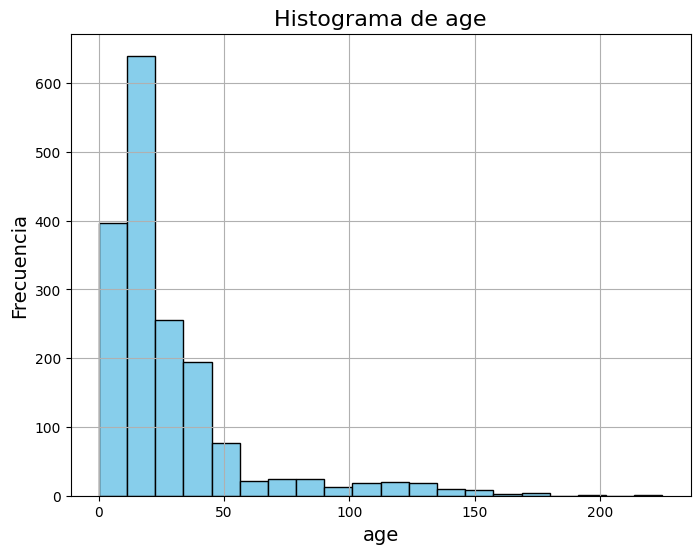

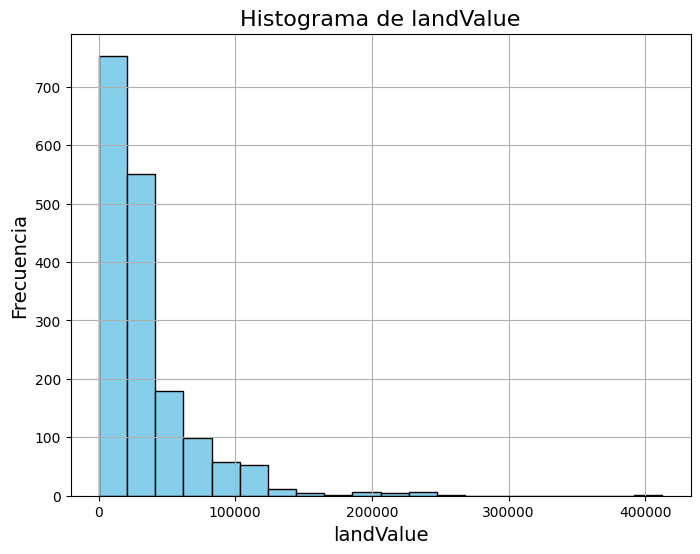

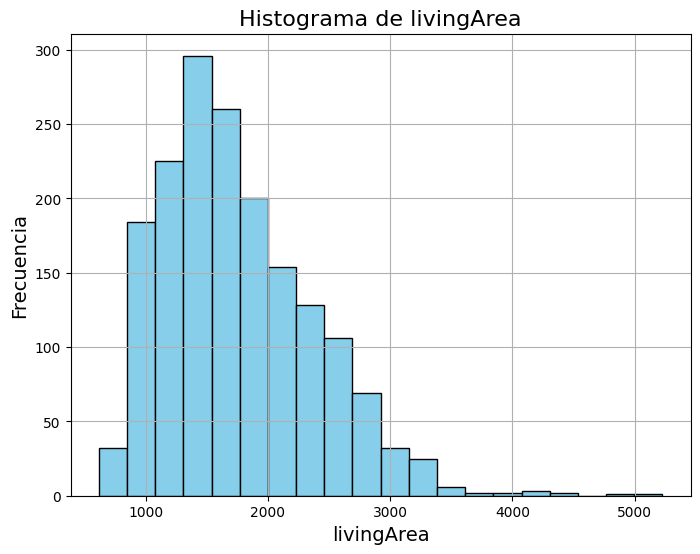

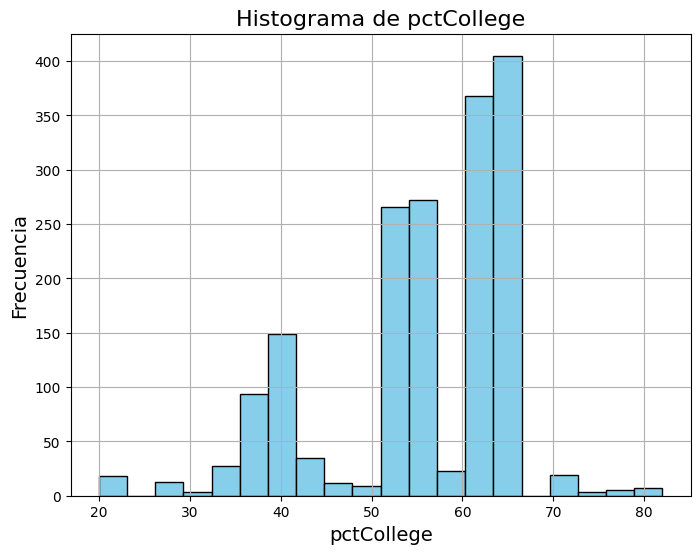

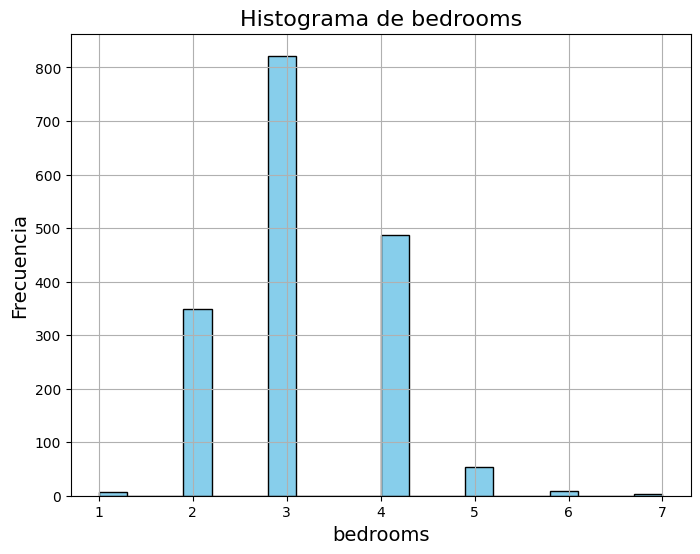

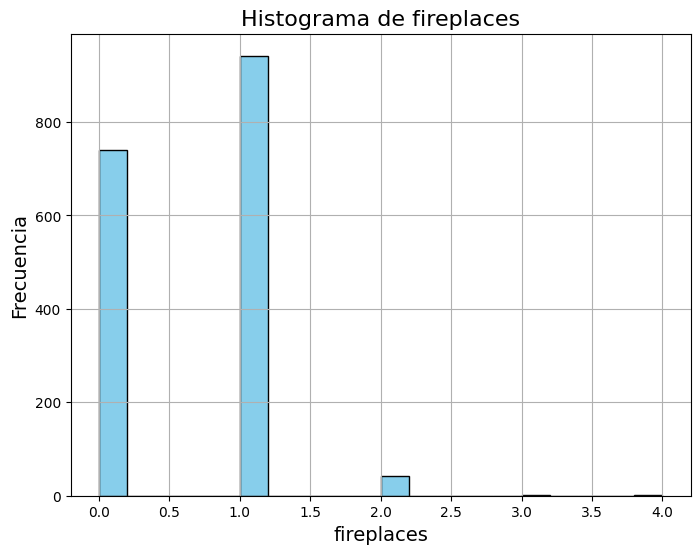

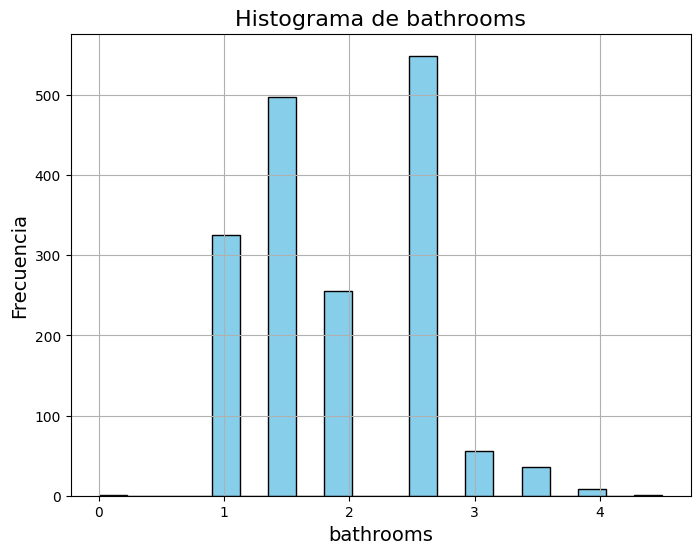

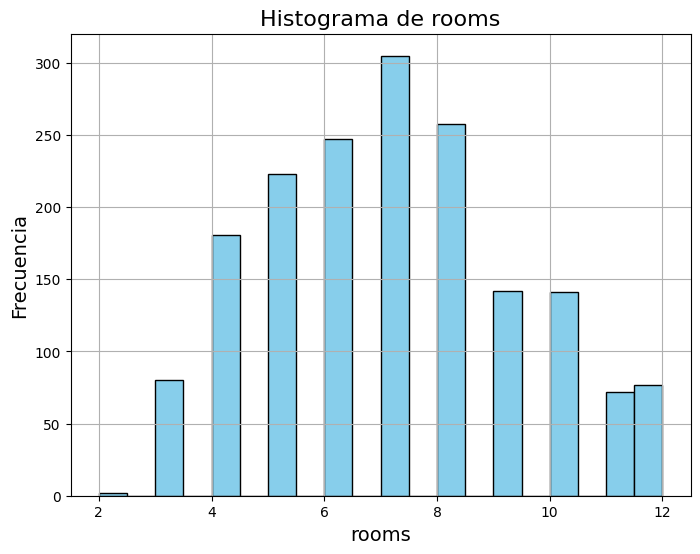

In [16]:
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Crear un histograma para cada variable numérica
for columna in variables_numericas.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[columna], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.grid(True)
    plt.show()

la mayoria de viviendas tienen una antiguedad menor a 50 años
la mayoria de las propiedads tiene un valor inferior a 100000
La mayoria de las casas tienen un tamaño entre 1000 y 3000 metros cuadrados. Esta variable dice que es metros cuadrados habitables pero podria ser metros cuadrados totales


In [17]:
df.lotSize.value_counts()

lotSize
0.46    85
0.15    74
0.16    72
1.00    64
0.17    41
        ..
1.22     1
1.06     1
1.04     1
1.07     1
4.21     1
Name: count, Length: 170, dtype: int64

esta variable es en metros cuadrados?

In [18]:
df[df['lotSize'] > df['livingArea']]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir


los metros cuadrados de la vivenda no pueden ser menores a los  metros cuadrados habitables. Esta variable esta mal o su unidad de medida no es metrosn cuadrados

In [50]:
df = df.drop('lotSize', axis=1)

## Variables Categoricas

In [19]:
for column in df.select_dtypes(include=['object']):
    print(df[column].value_counts())
    print(df[column].value_counts(normalize=True, dropna=False).sort_values(ascending=False))
    print("------------------------------")

heating
hot air            1121
electric            305
hot water/steam     302
Name: count, dtype: int64
heating
hot air            0.648727
electric           0.176505
hot water/steam    0.174769
Name: proportion, dtype: float64
------------------------------
fuel
gas         1197
electric     315
oil          216
Name: count, dtype: int64
fuel
gas         0.692708
electric    0.182292
oil         0.125000
Name: proportion, dtype: float64
------------------------------
sewer
public/commercial    1213
septic                503
none                   12
Name: count, dtype: int64
sewer
public/commercial    0.701968
septic               0.291088
none                 0.006944
Name: proportion, dtype: float64
------------------------------
waterfront
No     1713
Yes      15
Name: count, dtype: int64
waterfront
No     0.991319
Yes    0.008681
Name: proportion, dtype: float64
------------------------------
newConstruction
No     1647
Yes      81
Name: count, dtype: int64
newConstruction
No  

In [21]:
import seaborn as sns

<Axes: >

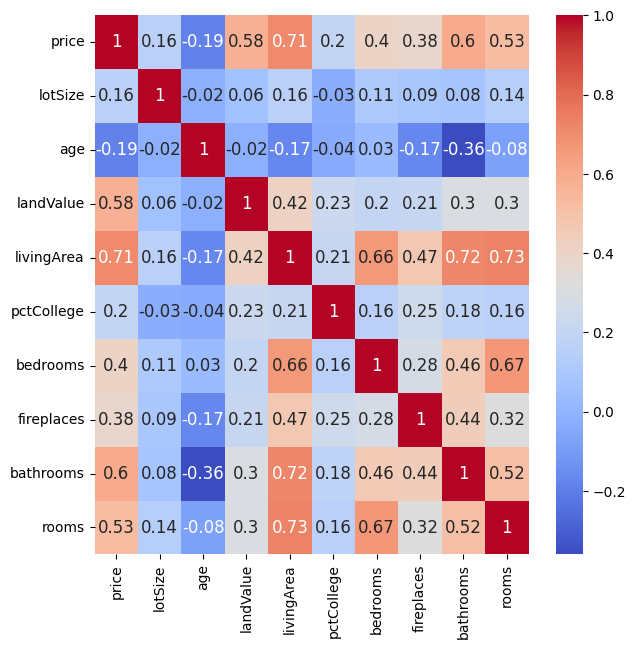

In [22]:
plt.figure(figsize = (7,7))
numeric_cols = df.select_dtypes(include=[float, int])
sns.heatmap(round(numeric_cols.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12})

se puede ver que variable que mas esta correlacionada con precio es livingArea(metros cuadrados)Tiene sentido que sea positivo, ya que una casa con mas metros sera mas cara. Despues LandValue, imagino que el precio d ela tierra esta incluido en el precio de la casa. Cantidad de cuartos tiene una correlación positiva ya que a mayor cantidad de cuartos, mayor es el precio. Algo que me llama la atención , es que la edad tiene una relación negativa con el precio. FirePlaces parece ser una variable con poca influencia en el precio

In [52]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['price'], df['livingArea'])

# Imprimir la correlación y el valor p asociado
print("Correlación:", corr)
print("Valor p:", p_value)

# Comprobar si la correlación es significativa
if p_value < 0.05:  # Usamos un nivel de significancia de 0.05
    print("La correlación es estadísticamente significativa.")
else:
    print("La correlación no es estadísticamente significativa.")

Correlación: 0.7123902334268234
Valor p: 9.48623993969218e-268
La correlación es estadísticamente significativa.


In [53]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['price'], df['fireplaces'])

# Imprimir la correlación y el valor p asociado
print("Correlación:", corr)
print("Valor p:", p_value)

# Comprobar si la correlación es significativa
if p_value < 0.05:  # Usamos un nivel de significancia de 0.05
    print("La correlación es estadísticamente significativa.")
else:
    print("La correlación no es estadísticamente significativa.")

Correlación: 0.3767862085956383
Valor p: 2.0860764346850402e-59
La correlación es estadísticamente significativa.


In [23]:
df[df['price'] < df['landValue']]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
850,10300,0.16,20,15700,912,54,2,1,1.5,4,electric,electric,public/commercial,No,No,No
890,10300,0.16,20,15700,912,54,2,1,1.5,6,electric,electric,public/commercial,No,No,No
1010,5000,0.29,4,35800,1700,63,3,1,2.5,6,hot air,gas,public/commercial,No,No,Yes


en estos casos el valor de la vivienda es menor que el del terreno. Voy a eliminarlos

In [24]:
df_numerical_corr =variables_numericas.corr()['price']
df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.5].sort_values(ascending=False)


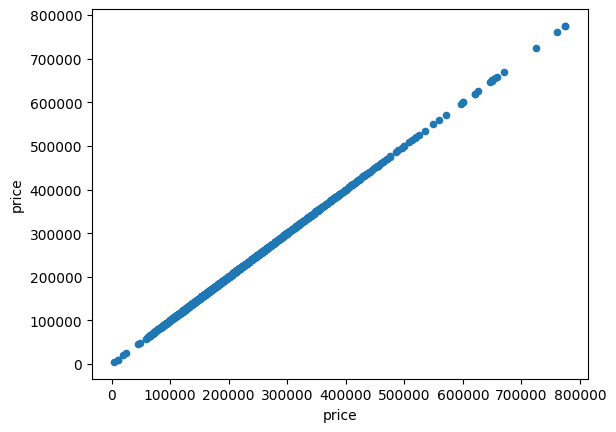

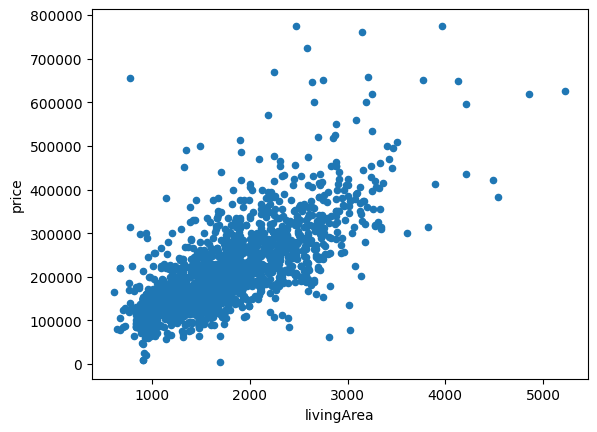

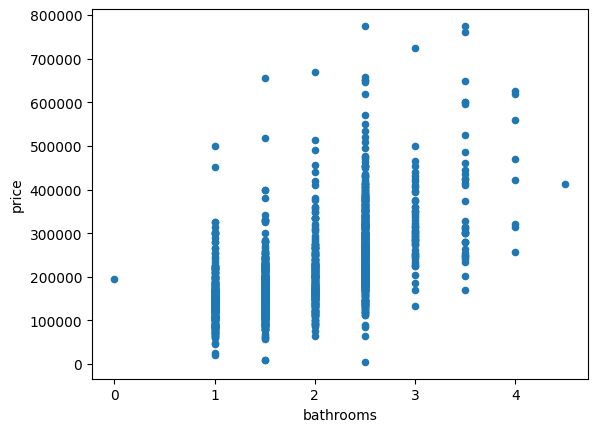

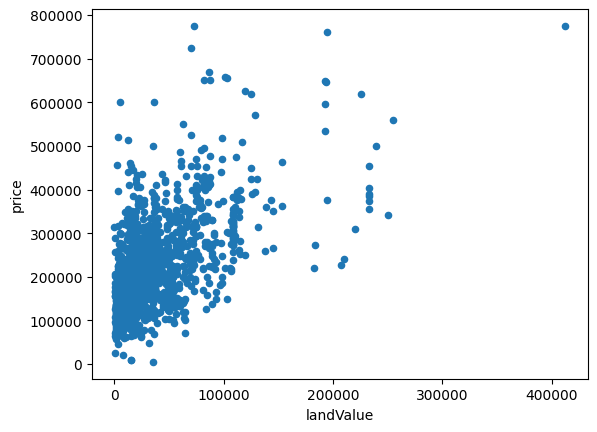

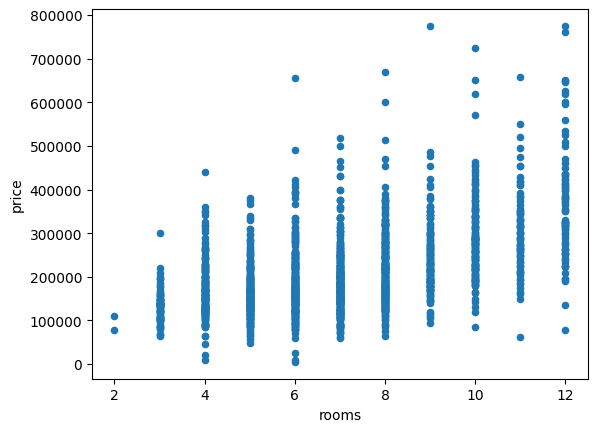

In [25]:
for idx in df_numerical_most_corr.index:
    df.plot(kind='scatter',
          x=idx,
          y='price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12')])

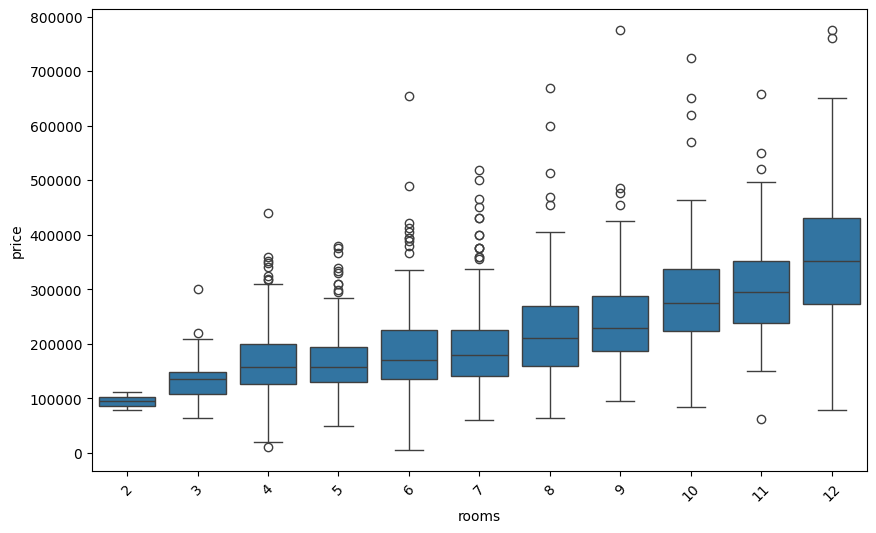

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='rooms', y='price', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

en este grafico podemos ver tambien la relacion positiva que hay entre estas variables

# outliers

<ipython-input-27-87fe5f4afd33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-27-87fe5f4afd33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-27-87fe5f4afd33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
<ipython-input-27-87fe5f4afd33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

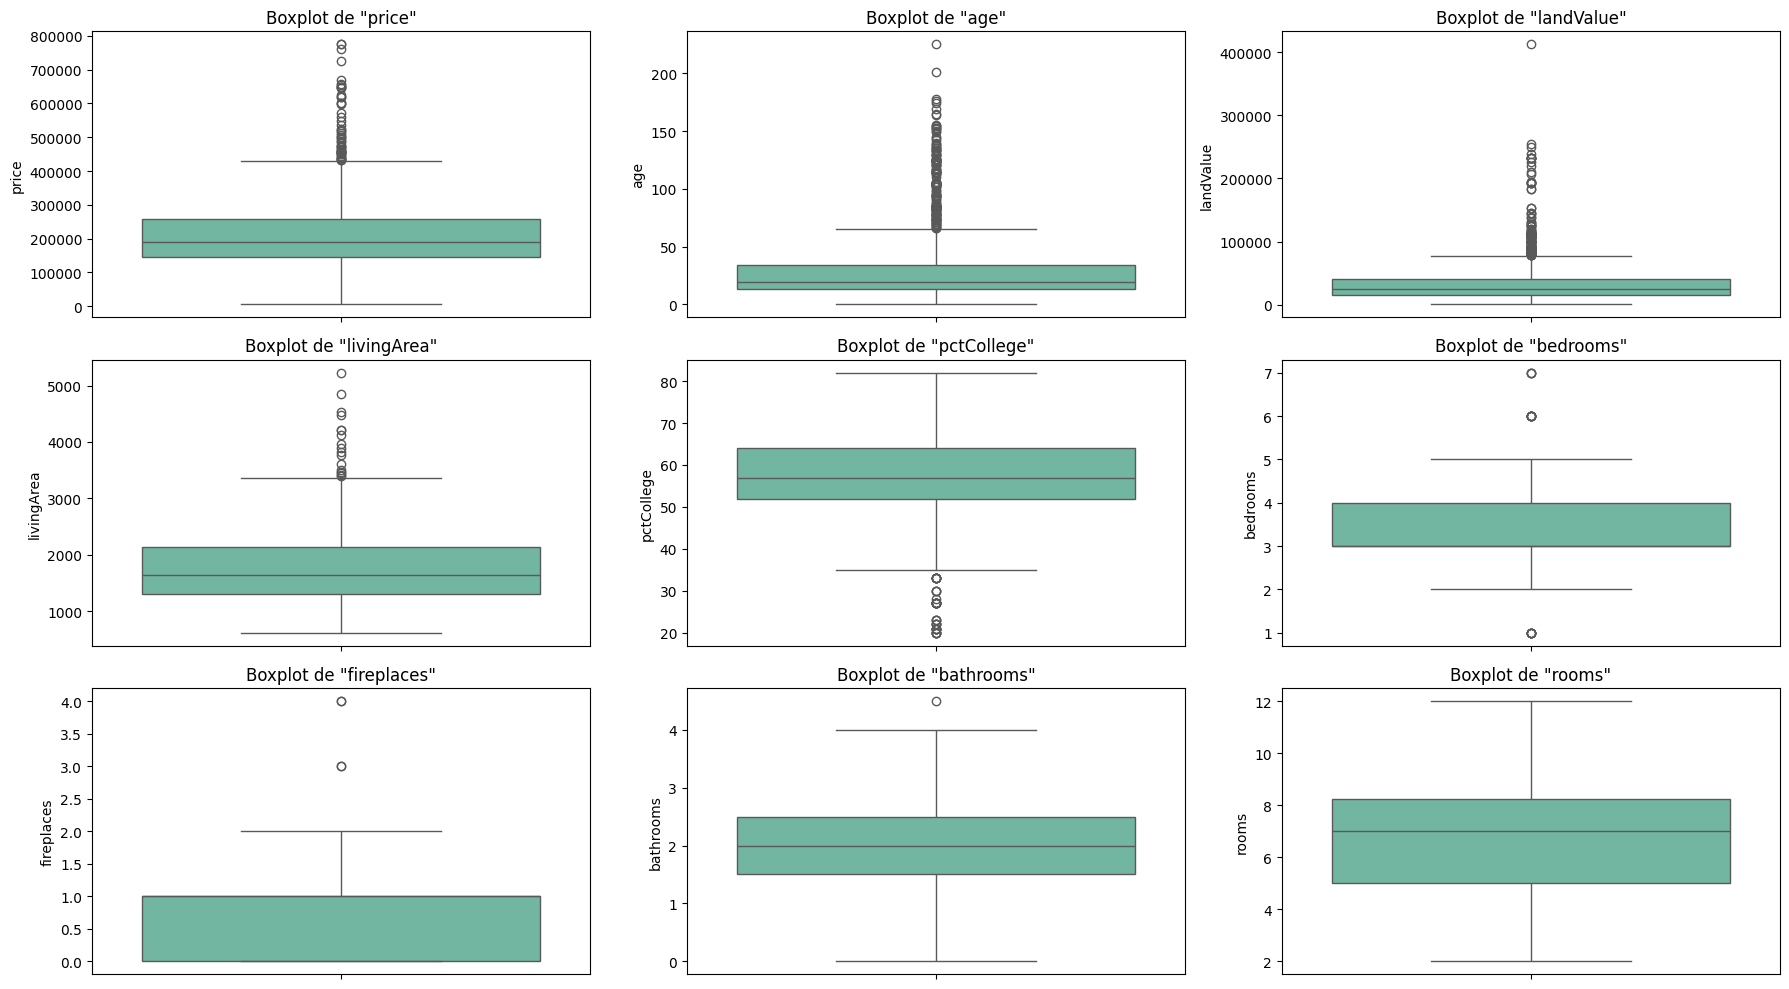

In [27]:
numeric_cols = ['price', 'age', 'landValue', 'livingArea', 'pctCollege', 'bedrooms', 'fireplaces', 'bathrooms', 'rooms']

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed
for i, column in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout here
    sns.boxplot(y=df[column], palette='Set2')
    plt.title(f'Boxplot de "{column}"')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
plt.show()

In [28]:
df.loc[df.landValue == df.landValue.max()]

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
701,775000,0.0,5,412600,2472,57,3,1,2.5,9,hot air,gas,septic,Yes,No,Yes


al tener pocas observaciones , no voy a eliminar estos outliers. En el modelo voy  a usar RobustScaler para que los outliers no afecten el modelo.

# codificación de variables categoricas

In [29]:
df.select_dtypes(include=['object'])

,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,electric,electric,septic,No,No,No
1,hot water/steam,gas,septic,No,No,No
2,hot water/steam,gas,public/commercial,No,No,No
3,hot air,gas,septic,No,No,No
4,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...
1723,hot water/steam,gas,public/commercial,No,No,No
1724,hot water/steam,gas,public/commercial,No,No,No
1725,hot air,gas,public/commercial,No,No,No
1726,hot air,gas,public/commercial,No,No,No


para las columnas voy a crear dummies  y  cambiar a binarias

In [30]:
df=pd.get_dummies(df, columns=['heating', 'fuel', 'sewer'])
df.replace({'No': 0, 'N': 0, 'Yes': 1}, inplace=True)

In [31]:
df.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'waterfront',
       'newConstruction', 'centralAir', 'heating_electric', 'heating_hot air',
       'heating_hot water/steam', 'fuel_electric', 'fuel_gas', 'fuel_oil',
       'sewer_none', 'sewer_public/commercial', 'sewer_septic'],
      dtype='object')

# division de datos en train y test

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
X =  df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Regresion Lineal


In [47]:
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps=[('scaler', RobustScaler()),
                           ('model', LinearRegression())])

# No hay hiperparámetros específicos para ajustar en la regresión lineal

# Ajustar el modelo
pipeline.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación
maeRegresion = mean_absolute_error(y_test, y_pred)
mseRegresion = mean_squared_error(y_test, y_pred)
rmseRegresion = mean_squared_error(y_test, y_pred, squared=False)
r2Regresion = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print("MAE:", Regresionmae)
print("MSE:", Regresionmse)
print("RMSE:", Regresionrmse)
print("R²:", Regresionr2)

# Evaluar el modelo con los datos de prueba
test_score = pipeline.score(X_test, y_test)
print("Puntaje en datos de prueba:", test_score)

Métricas de evaluación:
MAE: 45246.19400157712
MSE: 4649602923.35695
RMSE: 68187.99691556388
R²: 0.6034534644424194
Puntaje en datos de prueba: 0.6034534644424194


este modelo da un r2 muyb bajo. Voy a ver si con los modelos mas compleojos, esto puede aumentar.

## XGBoost

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform
from xgboost import XGBRegressor# Construir el pipeline con RobustScaler y el modelo XGBoost
pipeline = Pipeline(steps=[('scaler', RobustScaler()),
                           ('model', XGBRegressor())])



params = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.3),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__gamma': uniform(0, 0.3),
    'model__reg_alpha': uniform(0, 0.5),
    'model__reg_lambda': uniform(0, 0.5),
    'model__min_child_weight': randint(1, 10),
    'model__max_delta_step': randint(0, 3),
    'model__scale_pos_weight': [1, 2, 3]
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=30, cv=5, random_state=42)
grid.fit(X_train, y_train)

# Imprimir el mejor puntaje y los mejores hiperparámetros encontrados
print("Mejor puntaje:", grid.best_score_)
print("Mejores hiperparámetros:", grid.best_params_)

# Evaluar el modelo con los datos de prueba
test_score = grid.score(X_test, y_test)
print("score:", test_score)
y_pred = grid.predict(X_test)

maeXG = mean_absolute_error(y_test, y_pred)
mseXG = mean_squared_error(y_test, y_pred)
rmseXG = mean_squared_error(y_test, y_pred, squared=False)
r2XG = r2_score(y_test, y_pred)
# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print("MAE:", maeXG)
print("MSE:", mseXG)
print("RMSE:", rmseXG)
print("R²:", r2XG)


Mejor puntaje: 0.6923613576264585
Mejores hiperparámetros: {'model__colsample_bytree': 0.9238004184558861, 'model__gamma': 0.10459979618751881, 'model__learning_rate': 0.03885296532742623, 'model__max_delta_step': 0, 'model__max_depth': 3, 'model__min_child_weight': 8, 'model__n_estimators': 227, 'model__reg_alpha': 0.25887567526374006, 'model__reg_lambda': 0.418855052953664, 'model__scale_pos_weight': 3, 'model__subsample': 0.7364265404201034}
score: 0.6748686586057759
Métricas de evaluación:
MAE: 40151.5834763367
MSE: 3812242700.080377
RMSE: 61743.3615871405
R²: 0.6748686586057759


utilizo random search para que sea más rapido

## LGBM

In [46]:
import lightgbm
from lightgbm import LGBMRegressor
pipeline = Pipeline(steps=[('scaler', RobustScaler()),
                           ('model', LGBMRegressor())])

params = {
    'model__n_estimators': randint(100, 500),  # Número de árboles
    'model__max_depth': randint(3, 10),  # Profundidad máxima del árbol
    'model__learning_rate': uniform(0.01, 0.5),  # Tasa de aprendizaje
    'model__subsample': uniform(0.6, 0.4),  # Proporción de muestras a utilizar para entrenar cada árbol
    'model__colsample_bytree': uniform(0.6, 0.4),  # Proporción de características a considerar en cada división de árbol
    'model__reg_alpha': uniform(0, 1),  # Término de regularización L1
    'model__reg_lambda': uniform(0, 1),  # Término de regularización L2
    'model__min_child_weight': randint(1, 10),  # Peso mínimo necesario en un nodo hoja
    'model__gamma': uniform(0, 1),  # Parámetro de penalización para dividir un nodo
    'model__max_delta_step': randint(0, 5),  # Máximo cambio permitido en el peso de la instancia
    'model__scale_pos_weight': [1, 2, 3]  # Peso positivo de las muestras
}
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid = RandomizedSearchCV(pipeline, params, n_iter=30, cv=5, random_state=42)
grid.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred = grid.predict(X_test)

# Calcular métricas de evaluación
maeLGBM = mean_absolute_error(y_test, y_pred)
mseLGBM = mean_squared_error(y_test, y_pred)
rmseLGBM = mean_squared_error(y_test, y_pred, squared=False)
r2LGBM = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print("MAE:", maeLGBM)
print("MSE:", mseLGBM)
print("RMSE:", rmseLGBM)
print("R²:", r2LGBM)

# Imprimir el mejor puntaje y los mejores hiperparámetros encontrados
print("Mejor puntaje:", grid.best_score_)
print("Mejores hiperparámetros:", grid.best_params_)

# Evaluar el modelo con los datos de prueba
test_score = grid.score(X_test, y_test)
print("test score:", test_score)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 19
[LightGBM] [Info] Start training from score 210106.631674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

# Conclusiones

In [48]:
import pandas as pd

# Crear un diccionario con las métricas de cada modelo
metrics_data = {
    'Modelo': ['XGBoost', 'LightGBM', 'Regresión Lineal'],
    'MAE': [maeXG, maeLGBM, maeRegresion],
    'MSE': [mseXG, mseLGBM, mseRegresion],
    'RMSE': [rmseXG, rmseLGBM, rmseRegresion],
    'R²': [r2XG, r2LGBM, r2Regresion]
}

# Crear un DataFrame de Pandas con las métricas
metrics_df = pd.DataFrame(metrics_data)

# Mostrar la tabla de métricas
print(metrics_df)

             Modelo           MAE           MSE          RMSE        R²
0           XGBoost  40151.583476  3.812243e+09  61743.361587  0.674869
1          LightGBM  40388.224837  3.763346e+09  61346.115707  0.679039
2  Regresión Lineal  45246.194002  4.649603e+09  68187.996916  0.603453


El r2 es la metrica que muestra que tan bien los datos explican la variable Objetivo. El modelo con mayor R2 es LGBM  y el menor es Linear regression.

LBM tambien tiene menor RMSE de 61346, es decir, en promedio, las predicciones destán alejadas del valor real del precio de las casas en 61346 pesos. Siendo la media del precio de una casa 211966.705440, el error es un poco alto.

Se podrían mejorar los modelos, optimizando los hiper parametros y haciendo un gridsearch.
Todas tienen valores similares en las metricas pero recomendaría la que tiene mayor R2 ya que explica mejor los datos.